In [45]:
import pandas as pd
import numpy as np 
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('bureau_balance.csv')
data.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [25]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [50]:
a_train = pd.read_csv('application_train.csv')
a_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
data.nunique()

SK_ID_BUREAU      817395
MONTHS_BALANCE        97
STATUS                 8
dtype: int64

In [19]:
non_null_bb = data[~data['SK_ID_BUREAU'].isnull()].reset_index(drop=True)
non_null_bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [22]:
non_null_bb['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [21]:
MB = non_null_bb.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].min()
MB.head()

,SK_ID_BUREAU,MONTHS_BALANCE
0,5001709,-96
1,5001710,-82
2,5001711,-3
3,5001712,-18
4,5001713,-21


In [23]:
new_nnbb = pd.get_dummies(non_null_bb,prefix=['STATUS'])
new_nnbb = new_nnbb.groupby('SK_ID_BUREAU', as_index=False)['STATUS_0','STATUS_1','STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X'].sum()
new_nnbb.head()

<ipython-input-23-6d714d3e65cf>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_nnbb = new_nnbb.groupby('SK_ID_BUREAU', as_index=False)['STATUS_0','STATUS_1','STATUS_2', 'STATUS_3', 'STATUS_4', 'STATUS_5', 'STATUS_C', 'STATUS_X'].sum()


,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5001709,0,0,0,0,0,0,86,11
1,5001710,5,0,0,0,0,0,48,30
2,5001711,3,0,0,0,0,0,0,1
3,5001712,10,0,0,0,0,0,9,0
4,5001713,0,0,0,0,0,0,0,22


In [24]:
new_nnbb = new_nnbb.merge(MB, on = 'SK_ID_BUREAU', how = 'right')
# train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
new_nnbb.head()

,SK_ID_BUREAU,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MONTHS_BALANCE
0,5001709,0,0,0,0,0,0,86,11,-96
1,5001710,5,0,0,0,0,0,48,30,-82
2,5001711,3,0,0,0,0,0,0,1,-3
3,5001712,10,0,0,0,0,0,9,0,-18
4,5001713,0,0,0,0,0,0,0,22,-21


In [26]:
new_nnb = bureau.merge(new_nnbb, on = 'SK_ID_BUREAU', how = 'right')
new_nnb.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X,MONTHS_BALANCE
0,NaN,5001709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,0,0,0,0,0,86,11,-96
1,162368.0,5001710,Closed,currency 1,-2497.0,0.0,-1402.0,-1439.0,NaN,0.0,...,0.0,5,0,0,0,0,0,48,30,-82
2,162368.0,5001711,Active,currency 1,-115.0,0.0,30865.0,NaN,NaN,0.0,...,0.0,3,0,0,0,0,0,0,1,-3
3,162368.0,5001712,Closed,currency 1,-568.0,0.0,-264.0,-264.0,0.0,0.0,...,NaN,10,0,0,0,0,0,9,0,-18
4,150635.0,5001713,Closed,currency 1,-652.0,0.0,-75.0,-316.0,NaN,0.0,...,NaN,0,0,0,0,0,0,0,22,-21


In [48]:
def sns_dist(data, col, plot_name):
    plt.figure(figsize=(12,5))
    plt.title(plot_name)
    ax = sns.distplot(data[col])
    return

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


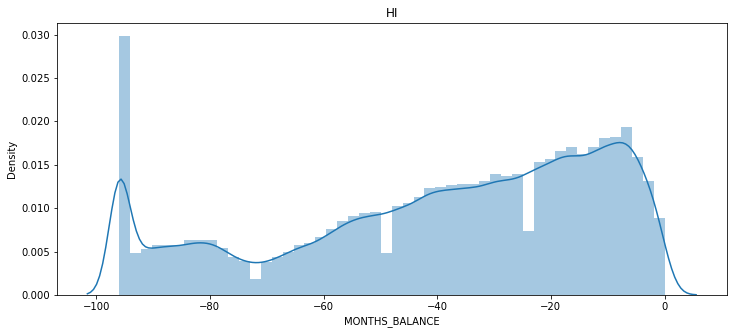

In [49]:
sns_dist(new_nnb, 'MONTHS_BALANCE','HI')

In [51]:
new_train = a_train.merge(new_nnb, on = 'SK_ID_CURR', how = 'right')

In [52]:
new_train = new_train[~new_train['TARGET'].isnull()]

In [53]:
new_train.isnull().sum()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
                     ..
STATUS_4              0
STATUS_5              0
STATUS_C              0
STATUS_X              0
MONTHS_BALANCE        0
Length: 147, dtype: int64

In [54]:
def check_relation(data, col):
    
    temp = data[col].value_counts()
    temp_y0 = []
    temp_y1 = []
    temp_per = []
    for val in temp.index:
        Y = np.sum(data["TARGET"][data[col]==val] == 1)
        N = np.sum(data["TARGET"][data[col]==val] == 0)
        temp_y1.append(Y)
        temp_y0.append(N) 
        temp_per.append((Y/(Y+N))*100)
    
    count_y0, count_y1 = temp_y0[0], temp_y1[0]
    count_rest0, count_rest1 = np.sum(temp_y0[1:]), np.sum(temp_y1[1:])
    print ("The ratio of Zero Count: {}%".format(count_y1*100 /(count_y0+count_y1)))
    print ("The ratio of Count > Zero: {}%".format(count_rest1*100/ (count_rest0 + count_rest1)))
    
    return

In [55]:
# Since the occurance of STATUS C does not show significant correlation with the Target value, we could drop it.
check_relation(new_train, "STATUS_C")

The ratio of Zero Count: 9.459967781239524%
The ratio of Count > Zero: 7.232457508326253%


# t có thể làm tương tự các cột dummies khác để xem thêm về corr nhưng có gì cm cứ xem qua trc xem ok khum 